# Capstone Analytic Report and Research Proposal

## 1. Describe the Dataset

*Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.*

- A ~500K CSV with summary of some real network traffic data from the past. 
- The dataset has ~21K rows and covers 10 local workstation IPs over a three month period
- Data comes from Standford http://statweb.stanford.edu/~sabatti/data.html
- eports of "odd" activity or suspicions about a machine's behavior triggered investigations on the following days (although the machine might have been compromised earlier)
    -  Date  : IP
    -  08-24 : 1
    -  09-04 : 5
    -  09-18 : 4
    -  09-26 : 3 & 6

## 2. Analytic Questions

Half of these local IPs were compromised at some point during this period and became members of various botnets. When did a compromise occurre by a change in the pattern of communication?

## 3. Further Reserach

Normal patterns of network data needs to be reserced to develop patterns to compare.

In [1]:
import numpy as np # Linear Algegra module
import pandas as pd # Data processing module
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Computer_security_data_set.csv')

In [3]:
df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [4]:
#Renames columns for ease of reference.
df.rename(columns={'date': 'Date', 'l_ipn':'Local_IP', 'r_asn':'Remote_ASN','f':'Flows'}, inplace=True) 

In [5]:
df.head()

,Date,Local_IP,Remote_ASN,Flows
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [6]:
df.describe()

,Local_IP,Remote_ASN,Flows
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


* date: yyyy-mm-dd (from 2006-07-01 through 2006-09-30)
* l_ipn: local IP (coded as an integer from 0-9)
* r_asn: remote ASN (an integer which identifies the remote ISP)
* f: flows (count of connnections for that day)

In [7]:
df['Date']= pd.to_datetime(df['Date'])
df = df.groupby(['Date','Local_IP'],as_index=False).sum()

df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [8]:
df.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,847.000000,8.470000e+02,847.000000,847.000000,847.000000
mean,4.637544,2.981269e+05,2306.609209,224.747344,3.003542
std,2.899361,2.196820e+05,28582.894686,25.748739,2.012076
min,0.000000,7.768000e+03,4.000000,182.000000,0.000000
25%,2.000000,1.410115e+05,60.000000,203.000000,1.000000
50%,5.000000,2.403990e+05,346.000000,224.000000,3.000000
75%,7.000000,4.130475e+05,1429.500000,246.000000,5.000000
max,9.000000,1.394690e+06,785297.000000,273.000000,6.000000


In [15]:
### Create a table for each Local IP Address designated 0 - 9

Local_IP_0 = df[df['Local_IP']==0]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_1 = df[df['Local_IP']==1]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_2 = df[df['Local_IP']==2]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_3 = df[df['Local_IP']==3]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_4 = df[df['Local_IP']==4]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_5 = df[df['Local_IP']==5]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_6 = df[df['Local_IP']==6]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_7 = df[df['Local_IP']==7]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_8 = df[df['Local_IP']==8]
max0 = np.max(Local_IP_0['Flows'])

Local_IP_9 = df[df['Local_IP']==9]
max0 = np.max(Local_IP_0['Flows'])



In [16]:
Local_IP_0.head()
Local_IP_0.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,92.0,92.000000,92.000000,92.00000,92.000000
mean,0.0,514387.228261,1143.228261,227.50000,3.021739
std,0.0,118909.500872,1528.763489,26.70206,2.010840
min,0.0,231835.000000,68.000000,182.00000,0.000000
25%,0.0,431119.250000,158.750000,204.75000,1.000000
50%,0.0,496727.000000,419.500000,227.50000,3.000000
75%,0.0,589451.000000,1502.000000,250.25000,5.000000
max,0.0,844524.000000,7488.000000,273.00000,6.000000


In [17]:
Local_IP_1.head()
Local_IP_1.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,56.0,56.000000,56.000000,56.000000,56.000000
mean,1.0,432932.714286,3494.482143,209.553571,2.928571
std,0.0,123977.751876,2533.397015,16.406118,2.052556
min,1.0,7768.000000,11.000000,182.000000,0.000000
25%,1.0,350929.500000,1685.250000,195.750000,1.000000
50%,1.0,446088.500000,2388.500000,209.500000,3.000000
75%,1.0,516566.250000,4912.750000,223.250000,5.000000
max,1.0,671639.000000,10574.000000,240.000000,6.000000


In [18]:
Local_IP_2.head()
Local_IP_2.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,92.0,92.000000,92.000000,92.00000,92.000000
mean,2.0,343680.663043,2127.315217,227.50000,3.021739
std,0.0,120746.142496,1855.762910,26.70206,2.010840
min,2.0,96897.000000,424.000000,182.00000,0.000000
25%,2.0,276768.250000,1052.000000,204.75000,1.000000
50%,2.0,335017.500000,1477.500000,227.50000,3.000000
75%,2.0,391646.500000,2619.500000,250.25000,5.000000
max,2.0,998118.000000,13421.000000,273.00000,6.000000


In [19]:
Local_IP_3.head()
Local_IP_3.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,89.0,89.000000,89.000000,89.000000,89.000000
mean,3.0,146255.393258,55.101124,226.000000,2.988764
std,0.0,59553.071789,57.012966,25.836021,2.030978
min,3.0,10784.000000,9.000000,182.000000,0.000000
25%,3.0,103191.000000,27.000000,204.000000,1.000000
50%,3.0,148288.000000,39.000000,226.000000,3.000000
75%,3.0,186714.000000,58.000000,248.000000,5.000000
max,3.0,259791.000000,350.000000,270.000000,6.000000


In [20]:
Local_IP_4.head()
Local_IP_4.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,86.0,86.000000,86.000000,86.000000,86.000000
mean,4.0,221409.883721,13667.639535,224.918605,2.988372
std,0.0,116380.817941,89226.507794,25.685526,2.026264
min,4.0,60040.000000,91.000000,182.000000,0.000000
25%,4.0,158669.500000,281.250000,203.250000,1.000000
50%,4.0,204277.000000,632.000000,224.500000,3.000000
75%,4.0,248219.750000,1643.500000,245.750000,5.000000
max,4.0,897470.000000,785297.000000,273.000000,6.000000


In [21]:
Local_IP_5.head()
Local_IP_5.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,67.0,67.000000,67.000000,67.000000,67.000000
mean,5.0,193352.805970,86.268657,215.000000,3.000000
std,0.0,118991.637836,115.583052,19.485037,2.052345
min,5.0,10490.000000,5.000000,182.000000,0.000000
25%,5.0,127421.000000,43.000000,198.500000,1.000000
50%,5.0,168012.000000,57.000000,215.000000,3.000000
75%,5.0,223805.000000,80.000000,231.500000,5.000000
max,5.0,839645.000000,862.000000,248.000000,6.000000


In [22]:
Local_IP_6.head()
Local_IP_6.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,89.0,89.000000,89.000000,89.000000,89.000000
mean,6.0,165709.325843,74.988764,226.000000,2.988764
std,0.0,70731.621700,91.326524,25.836021,2.030978
min,6.0,14246.000000,8.000000,182.000000,0.000000
25%,6.0,114642.000000,35.000000,204.000000,1.000000
50%,6.0,158076.000000,47.000000,226.000000,3.000000
75%,6.0,202368.000000,70.000000,248.000000,5.000000
max,6.0,478564.000000,563.000000,270.000000,6.000000


In [23]:
Local_IP_7.head()
Local_IP_7.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,92.0,92.000000,92.000000,92.00000,92.000000
mean,7.0,304710.358696,384.369565,227.50000,3.021739
std,0.0,180584.612385,267.829646,26.70206,2.010840
min,7.0,41679.000000,55.000000,182.00000,0.000000
25%,7.0,185451.000000,185.000000,204.75000,1.000000
50%,7.0,263701.500000,341.000000,227.50000,3.000000
75%,7.0,407894.500000,513.750000,250.25000,5.000000
max,7.0,854414.000000,1293.000000,273.00000,6.000000


In [24]:
Local_IP_8.head()
Local_IP_8.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,92.0,9.200000e+01,92.000000,92.00000,92.000000
mean,8.0,2.721939e+05,1306.554348,227.50000,3.021739
std,0.0,2.381905e+05,1911.820572,26.70206,2.010840
min,8.0,2.539600e+04,7.000000,182.00000,0.000000
25%,8.0,7.729125e+04,265.750000,204.75000,1.000000
50%,8.0,1.969585e+05,603.500000,227.50000,3.000000
75%,8.0,3.979055e+05,1432.750000,250.25000,5.000000
max,8.0,1.140634e+06,11426.000000,273.00000,6.000000


In [25]:
Local_IP_9.head()
Local_IP_9.describe()

,Local_IP,Remote_ASN,Flows,Day_of_Year,Day_of_Week
count,92.0,9.200000e+01,92.000000,92.00000,92.000000
mean,9.0,3.966420e+05,1182.358696,227.50000,3.021739
std,0.0,4.070223e+05,1285.700037,26.70206,2.010840
min,9.0,8.279000e+03,4.000000,182.00000,0.000000
25%,9.0,1.829700e+04,5.000000,204.75000,1.000000
50%,9.0,3.290660e+05,821.500000,227.50000,3.000000
75%,9.0,6.860645e+05,2240.500000,250.25000,5.000000
max,9.0,1.394690e+06,4378.000000,273.00000,6.000000


In [34]:
count, division = np.histogram(Local_IP_0['Flows'],bins=100)
division

array([  68. ,  142.2,  216.4,  290.6,  364.8,  439. ,  513.2,  587.4,
        661.6,  735.8,  810. ,  884.2,  958.4, 1032.6, 1106.8, 1181. ,
       1255.2, 1329.4, 1403.6, 1477.8, 1552. , 1626.2, 1700.4, 1774.6,
       1848.8, 1923. , 1997.2, 2071.4, 2145.6, 2219.8, 2294. , 2368.2,
       2442.4, 2516.6, 2590.8, 2665. , 2739.2, 2813.4, 2887.6, 2961.8,
       3036. , 3110.2, 3184.4, 3258.6, 3332.8, 3407. , 3481.2, 3555.4,
       3629.6, 3703.8, 3778. , 3852.2, 3926.4, 4000.6, 4074.8, 4149. ,
       4223.2, 4297.4, 4371.6, 4445.8, 4520. , 4594.2, 4668.4, 4742.6,
       4816.8, 4891. , 4965.2, 5039.4, 5113.6, 5187.8, 5262. , 5336.2,
       5410.4, 5484.6, 5558.8, 5633. , 5707.2, 5781.4, 5855.6, 5929.8,
       6004. , 6078.2, 6152.4, 6226.6, 6300.8, 6375. , 6449.2, 6523.4,
       6597.6, 6671.8, 6746. , 6820.2, 6894.4, 6968.6, 7042.8, 7117. ,
       7191.2, 7265.4, 7339.6, 7413.8, 7488. ])

Line plots showing Local IPs data over time


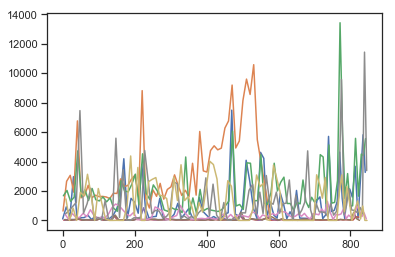

In [141]:
print('Line plots showing Local IPs data over time')

plt.plot(Local_IP_0.iloc[0:100]['Flows'])
plt.plot(Local_IP_1.iloc[0:100]['Flows'])
plt.plot(Local_IP_2.iloc[0:100]['Flows'])
plt.plot(Local_IP_3.iloc[0:100]['Flows'])
#plt.plot(Local_IP_4.iloc[0:100]['Flows'])
plt.plot(Local_IP_5.iloc[0:100]['Flows'])
plt.plot(Local_IP_6.iloc[0:100]['Flows'])
plt.plot(Local_IP_7.iloc[0:100]['Flows'])
plt.plot(Local_IP_8.iloc[0:100]['Flows'])
plt.plot(Local_IP_9.iloc[0:100]['Flows'])


plt.show()

Line plots showing Local IPs data over time


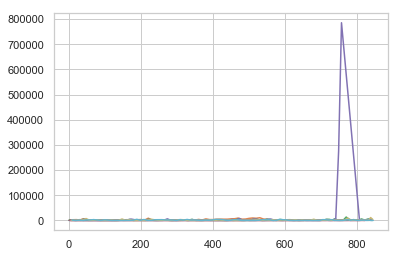

In [73]:
print('Line plots showing Local IPs data over time')

plt.plot(Local_IP_0.iloc[0:100]['Flows'])
plt.plot(Local_IP_1.iloc[0:100]['Flows'])
plt.plot(Local_IP_2.iloc[0:100]['Flows'])
plt.plot(Local_IP_3.iloc[0:100]['Flows'])
plt.plot(Local_IP_4.iloc[0:100]['Flows'])
plt.plot(Local_IP_5.iloc[0:100]['Flows'])
plt.plot(Local_IP_6.iloc[0:100]['Flows'])
plt.plot(Local_IP_7.iloc[0:100]['Flows'])
plt.plot(Local_IP_8.iloc[0:100]['Flows'])
plt.plot(Local_IP_9.iloc[0:100]['Flows'])


plt.show()

Scatterplots comparing traffic between all Local IPs.


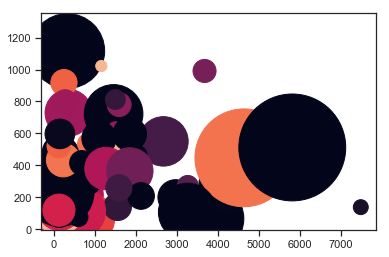

In [158]:
print('Scatterplots comparing traffic between all Local IPs.')
#plt.scatter(Local_IP_0['Flows'],Local_IP_1['Flows'],Local_IP_2['Flows'],Local_IP_3['Flows'],Local_IP_4['Flows'],Local_IP_5['Flows'],Local_IP_6['Flows'],Local_IP_7['Flows'],Local_IP_8['Flows'],Local_IP_9['Flows'])
plt.scatter(Local_IP_0.iloc[0:1000]['Flows'], Local_IP_7.iloc[0:1000]['Flows'],Local_IP_8.iloc[0:1000]['Flows'], Local_IP_9.iloc[0:1000]['Flows'])

plt.show()

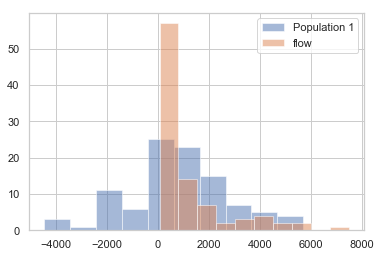

In [100]:
pop1 = np.random.normal(1000, 2000, 100)


# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(Local_IP_0.iloc[0:100]['Flows'], alpha=0.5, label='flow') 
plt.legend(loc='upper right') 
plt.show()

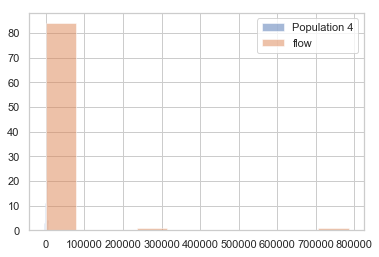

In [101]:
pop4 = np.random.normal(1000, 2000, 100)


# Let’s make histograms for the two groups. 

plt.hist(pop4, alpha=0.5, label='Population 4') 
plt.hist(Local_IP_4.iloc[0:100]['Flows'], alpha=0.5, label='flow') 
plt.legend(loc='upper right') 
plt.show()

QQ plots show how close a variable is to known distribution, and any outliers.


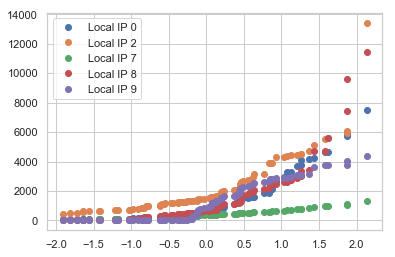

In [120]:
print('QQ plots show how close a variable is to known distribution, and any outliers.')
norm= np.random.normal(0, 1, 92)
norm.sort()
plt.plot(norm, Local_IP_0['Flows'].sort_values(), "o", label='Local IP 0') 
plt.plot(norm, Local_IP_2['Flows'].sort_values(), "o", label='Local IP 2')
plt.plot(norm, Local_IP_7['Flows'].sort_values(), "o", label='Local IP 7')
plt.plot(norm, Local_IP_8['Flows'].sort_values(), "o", label='Local IP 8')
plt.plot(norm, Local_IP_9['Flows'].sort_values(), "o", label='Local IP 9')
plt.legend(loc='upper left')
plt.show() 

QQ plots show how close a variable is to known distribution, and any outliers.


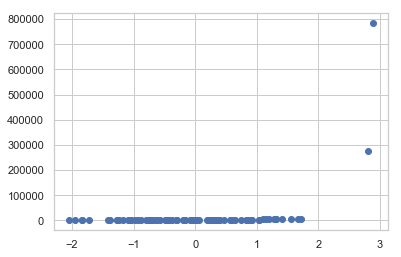

In [106]:
print('QQ plots show how close a variable is to known distribution, and any outliers.')
norm= np.random.normal(0, 1, 86)
norm.sort()
plt.plot(norm, Local_IP_4['Flows'].sort_values(), "o") 
plt.show() 

QQ plots show how close a variable is to known distribution, and any outliers.


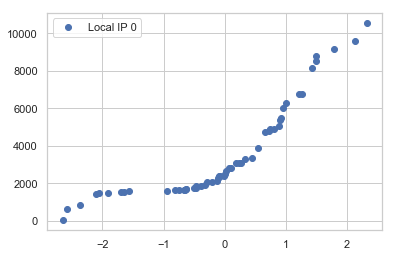

In [123]:
print('QQ plots show how close a variable is to known distribution, and any outliers.')
norm= np.random.normal(0, 1, 56)
norm.sort()
plt.plot(norm, Local_IP_1['Flows'].sort_values(), "o", label='Local IP 0') 
#plt.plot(norm, Local_IP_2['Flows'].sort_values(), "o", label='Local IP 2')
#plt.plot(norm, Local_IP_7['Flows'].sort_values(), "o", label='Local IP 7')
#plt.plot(norm, Local_IP_8['Flows'].sort_values(), "o", label='Local IP 8')
#plt.plot(norm, Local_IP_9['Flows'].sort_values(), "o", label='Local IP 9')
plt.legend(loc='upper left')
plt.show() 

QQ plots show how close a variable is to known distribution, and any outliers.


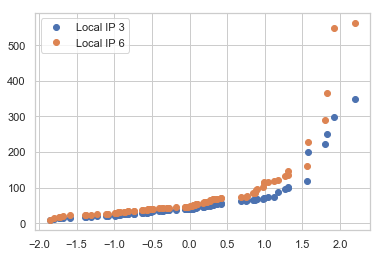

In [129]:
print('QQ plots show how close a variable is to known distribution, and any outliers.')
norm= np.random.normal(0, 1, 89)
norm.sort()
plt.plot(norm, Local_IP_3['Flows'].sort_values(), "o", label='Local IP 3') 
plt.plot(norm, Local_IP_6['Flows'].sort_values(), "o", label='Local IP 6')
#plt.plot(norm, Local_IP_7['Flows'].sort_values(), "o", label='Local IP 7')
#plt.plot(norm, Local_IP_8['Flows'].sort_values(), "o", label='Local IP 8')
#plt.plot(norm, Local_IP_9['Flows'].sort_values(), "o", label='Local IP 9')
plt.legend(loc='upper left')
plt.show() 

QQ plots show how close a variable is to known distribution, and any outliers.


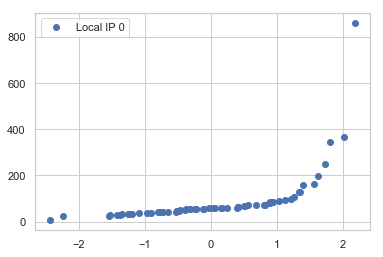

In [127]:
print('QQ plots show how close a variable is to known distribution, and any outliers.')
norm= np.random.normal(0, 1, 67)
norm.sort()
plt.plot(norm, Local_IP_5['Flows'].sort_values(), "o", label='Local IP 0') 
#plt.plot(norm, Local_IP_2['Flows'].sort_values(), "o", label='Local IP 2')
#plt.plot(norm, Local_IP_7['Flows'].sort_values(), "o", label='Local IP 7')
#plt.plot(norm, Local_IP_8['Flows'].sort_values(), "o", label='Local IP 8')
#plt.plot(norm, Local_IP_9['Flows'].sort_values(), "o", label='Local IP 9')
plt.legend(loc='upper left')
plt.show() 

In [133]:
print('Boxplots are used to compare groups and to identify differences in variance, as well as outliers.')
plt.boxplot([Local_IP_0[Local_IP_0['Flows']=='g1'],Local_IP_1[Local_IP_1['Flows']=='g2']])
plt.show()

Boxplots are used to compare groups and to identify differences in variance, as well as outliers.


TypeError: invalid type comparison

        Date  Local_IP  Remote_ASN  Flows  Day_of_Year  Day_of_Week
0 2006-07-01         0      436704    106          182            5
1 2006-07-01         1      182194    640          182            5
2 2006-07-01         2      212966   1677          182            5
3 2006-07-01         3       96376     22          182            5


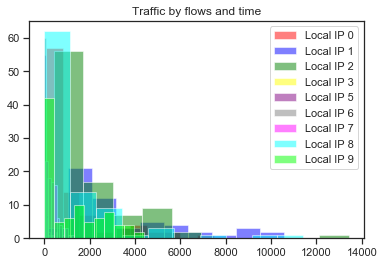

In [140]:
# Loading an example dataset provided by the seaborn package.
#tips = sns.load_dataset("Computer_security_data_set.csv")#
print(df.head(n=4))

# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
#menlunchtip = df.loc[(df['f']=='Flows')&(df['date']=='Date'),'f']
#womenlunchtip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Lunch'),'tip']
#mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner'),'tip']
#womendinnertip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Dinner'),'tip']

# Making overlapping histograms.
plt.hist(Local_IP_0['Flows'], color='red',  alpha=.5,label='Local IP 0')  # alpha just controls the opacity
plt.hist(Local_IP_1['Flows'], color='blue', alpha=.5,label='Local IP 1')
plt.hist(Local_IP_2['Flows'], color='green', alpha=.5,label='Local IP 2')  
plt.hist(Local_IP_3['Flows'], color='yellow', alpha=.5,label='Local IP 3')
#plt.hist(Local_IP_4['Flows'], color='orange', alpha=.5,label='Local IP 4')  
plt.hist(Local_IP_5['Flows'], color='purple', alpha=.5,label='Local IP 5')
plt.hist(Local_IP_6['Flows'], color='grey', alpha=.5,label='Local IP 6')  
plt.hist(Local_IP_7['Flows'], color='magenta', alpha=.5,label='Local IP 7')
plt.hist(Local_IP_8['Flows'], color='aqua', alpha=.5,label='Local IP 8')  
plt.hist(Local_IP_9['Flows'], color='lime', alpha=.5,label='Local IP 9')
plt.xlabel('')
plt.legend(loc='upper right')
plt.title('Traffic by flows and time')
plt.show()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
#g = sns.FacetGrid(tips, row="sex", col="time")
# Name the plot type and the variable to be plotted using the structure.
#g.map(plt.hist, "tip", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
#plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
#g.set_axis_labels('Tip in USD')
#plt.suptitle('Plot 2: Meal Tips by Gender and Time')
# Removing excess lines around the plot.
#sns.despine(trim=True)
#plt.show()

# Comparing groups using boxplots.
#ax = sns.boxplot(x='time',y='tip',hue='sex',data=tips)  
#plt.title('Plot 3: Meal Tips by Gender and Time')
#sns.despine(offset=10, trim=True)
#ax.set(xlabel='', ylabel='Tips')

#plt.show()